In [1]:
!pip install opendatasets

# load

In [2]:
import opendatasets as od
import os

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi

C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi


In [4]:
'''!pip install split-folders
'''

'!pip install split-folders\n'

In [5]:
'''import splitfolders
splitfolders.ratio('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog', output = 
                   'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data', 
                   seed = 42, ratio = (0.7, 0.3), group_prefix = None)'''

"import splitfolders\nsplitfolders.ratio('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog', output = \n                   'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data', \n                   seed = 42, ratio = (0.7, 0.3), group_prefix = None)"

In [6]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_cat_dir = os.path.join(train_dir, 'Cat')
train_dog_dir = os.path.join(train_dir, 'Dog')

test_cat_dir = os.path.join(test_dir, 'Cat')
test_dog_dir = os.path.join(test_dir, 'Dog')


In [7]:
print('Train_cat_dir :', os.listdir(train_cat_dir)[0:2])
print('Train_dog_dir :', os.listdir(train_dog_dir)[0:2])
print('Test_cat_dir :', os.listdir(test_cat_dir)[0:2])
print('Test_dog_dir :', os.listdir(test_dog_dir)[0:2])

Train_cat_dir : ['0.jpg', '1.jpg']
Train_dog_dir : ['0.jpg', '1.jpg']
Test_cat_dir : ['103.jpg', '104.jpg']
Test_dog_dir : ['1092.jpg', '1095.jpg']


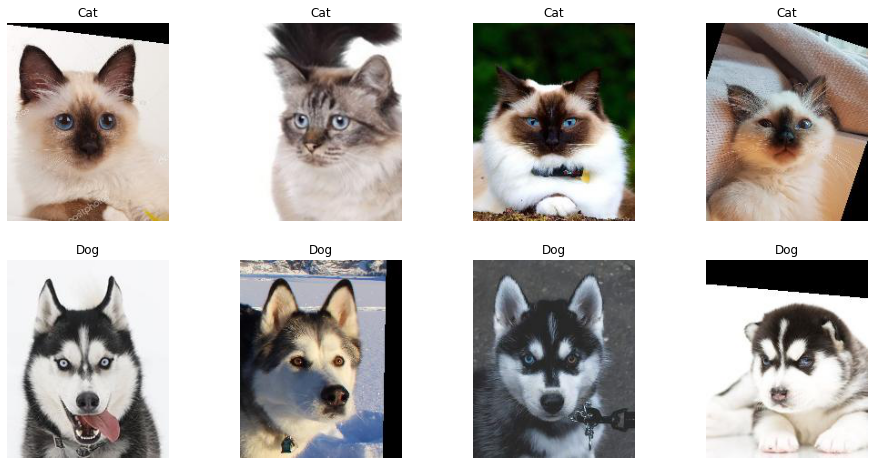

In [8]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
Train_cat = [os.path.join(train_cat_dir, fname) 
                for fname in os.listdir(train_cat_dir)[pic_index-4:pic_index]]

Train_dog = [os.path.join(train_dog_dir, fname) 
                for fname in os.listdir(train_dog_dir)[pic_index-4:pic_index]]
for i, img_path in enumerate(Train_cat+Train_dog):
    
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [9]:
'''import cv2
import numpy as np
'''

'import cv2\nimport numpy as np\n'

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      #shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2035 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Model Inception V3

In [23]:
!pip install keras


In [29]:
import tensorflow as tf
#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [33]:
base_convnet = InceptionV3(input_shape = (150,150,3),
                           include_top = False,
                           weights = "imagenet")

base_convnet.trainable = False 

last_layer = base_convnet.get_layer("mixed7")

last_output = last_layer.output

87916544/87910968 [==============================] - 7s 0us/step


In [35]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation="relu", kernel_initializer="he_normal")(x)
x = layers.Dense(512, activation="relu", kernel_initializer="he_normal")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = Model(base_convnet.input, x)
model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [40]:
# setting Callback so we can save the best model in format h5 and i save it in my drive
callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')        
direc = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model/best_model_train_transfer_learning_Inception.h5'
best_model = ModelCheckpoint(direc, monitor='val_acc', verbose = 1, save_best_only = True)

In [41]:
history = model.fit(train_generator,
                    epochs=100,
                    #steps_per_epoch=110,  # images = batch_size * steps
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks, best_model])

Epoch 1/100
102/102 [==============================] - 79s 775ms/step - loss: 0.0351 - acc: 0.9966 - val_loss: 1.3574e-04 - val_acc: 1.0000

Epoch 00001: val_acc improved from -inf to 1.00000, saving model to C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model\best_model_train_transfer_learning_Inception.h5
Epoch 2/100
102/102 [==============================] - 82s 801ms/step - loss: 0.0396 - acc: 0.9936 - val_loss: 1.9598e-10 - val_acc: 1.0000

Epoch 00002: val_acc did not improve from 1.00000
Epoch 3/100
102/102 [==============================] - 76s 750ms/step - loss: 0.0363 - acc: 0.9956 - val_loss: 4.4746e-07 - val_acc: 1.0000

Epoch 00003: val_acc did not improve from 1.00000
Epoch 4/100
102/102 [==============================] - 79s 775ms/step - loss: 0.0188 - acc: 0.9966 - val_loss: 1.2670e-10 - val_acc: 1.0000

Epoch 00004: val_acc did not improve from 1.00000
Epoch 5/100
102/102 [==============================] - 78s 768ms/step - loss: 0.0204 - acc: 0.9971 

# Model Evaluation

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

In [46]:
import json
from tensorflow.keras.models import load_model
target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model/'
model_saved = load_model(target_dir + 'best_model_train_transfer_learning_Inception.h5')

## Plotting + Accuracy

In [47]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


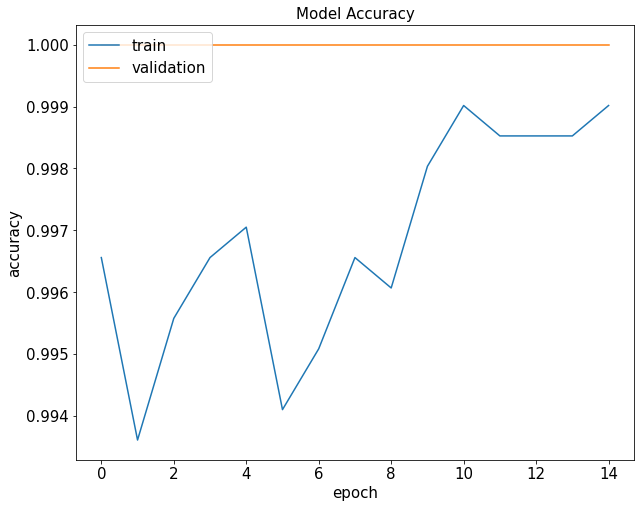

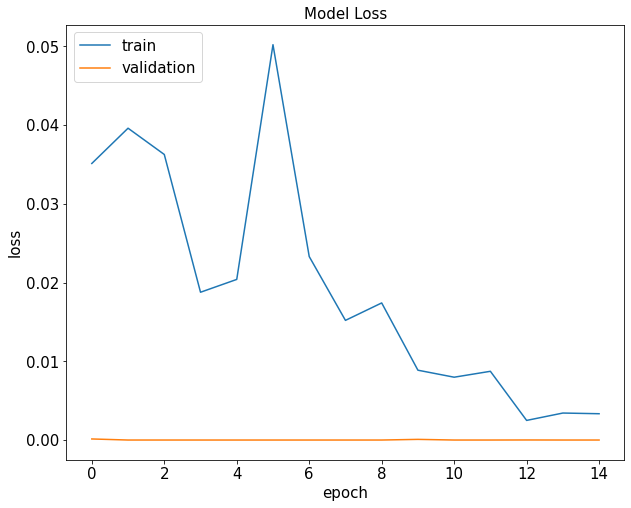

In [49]:
# summarize history for accuracy
plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15') 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=15)
plt.show()

## Classification Report + Confusion Matrix

In [50]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        shuffle=False,
        class_mode='binary')

Found 200 images belonging to 2 classes.


In [51]:
test_score = model_saved.evaluate_generator(test_generator, test_generator.batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 100.00%
[INFO] Loss:  0.00013574009062722325


In [52]:
predictions = model_saved.predict_generator(generator=test_generator)
test_pred = predictions > 0.5
y_test = test_generator.classes
Cmatrix_test = confusion_matrix(y_test, test_pred)

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [53]:
from sklearn.metrics import classification_report

label = test_generator.class_indices
print(classification_report(y_test, test_pred, target_names=label))

              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00       100
         Dog       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



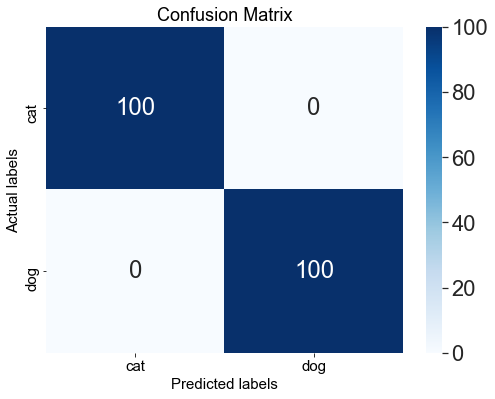

In [54]:
class_names = test_generator.class_indices
plt.figure(figsize = (8,6))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
cm_reshape = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(cm_reshape, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Actual labels', fontdict=label_font);

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(["cat", "dog"]);
ax.yaxis.set_ticklabels(["cat", "dog"]);
plt.show()